# Title: MVP 3

Name    : Joshua Hor Soong, Cheng
Email   : chen7647@umn.edu 


## 1. Design Framework

### 1.1. Problem Statement
- studying the differences about the zoning plans Minneapolis council has between now and 2040

### 1.2. Solution
using geopandas, we can plot each zones on the mineapolis map. both the current zones and the zone plans for 2040 to determine how much more residential or industrial is the council planning for Minneapolis to become

### 1.3. Challenge
determining the best way to evaluate the change of these zone change plans

### 1.4 Spec list

Fill in the spec list table below.
  * Value: (H)igh, (M)edium, (L)ow
  * Effort: (H)igh, (M)edium, (L)ow
  * Feature: Brief description of the feature


| Value | Effort  | Feature    | 
|:------|:--------|:-----------|
| H     | L       | a geographic visual comparison of the current zones vs the zone plans in 2040 |
| H     | M       | get the statistical calculations of the land size change of each zones |
| M     | H       | GeoAI processing - success rate of this change |


### 1.5 references and data sources

### source of data
https://opendata.minneapolismn.gov/datasets/cityoflakes::planning-primary-zoning/explore?location=44.970842%2C-93.261692%2C11.52&showTable=true

https://opendata.minneapolismn.gov/datasets/cityoflakes::future-land-use-and-built-form-2040/explore?showTable=true

### other informations related to the column headings
#### zoning codes and build form
https://www2.minneapolismn.gov/business-services/planning-zoning/zoning-maps/zoning-code-descriptions/#d.en.202240



___

# 2. Minimal Viable Product

## 2.1.1 Setup & Installation

In the code cell below, you will write all your import and load statements for the packages and data needed for your project.

In [140]:
# Import Modules and Packages you need to run your MVP in this code cell
# %pip install contextily
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

## 2.1.2 Opening .shp files and Evaluating tables

,OBJECTID,Land_Use,Land_Use_C,RuleID,Shape__Are,Shape__Len,geometry,color
0,1,Community Mixed Use,CM3,3,1.536807e+06,8634.627630,"POLYGON ((-10380666.499 5619819.426, -10380752...",orange
1,2,Community Mixed Use,CM3,3,8.506568e+05,6698.324164,"POLYGON ((-10380162.544 5616517.416, -10380162...",orange
2,3,Community Mixed Use,CM3,3,8.438099e+05,8203.085654,"POLYGON ((-10385535.998 5619061.383, -10385620...",orange
3,4,Community Mixed Use,CM3,3,7.769236e+05,8416.146208,"POLYGON ((-10378866.861 5613971.531, -10378840...",orange
4,5,Community Mixed Use,CM3,3,6.776263e+05,5310.060406,"POLYGON ((-10380509.12 5616192.283, -10380465....",orange
...,...,...,...,...,...,...,...,...
1255,1256,Urban Neighborhood 3,UN3,15,1.898438e+00,252.992459,"POLYGON ((-10377612.098 5605896.357, -10377610...",yellow
1256,1257,Urban Neighborhood 3,UN3,15,1.714844e+00,793.892966,"POLYGON ((-10378269.074 5610302.759, -10378269...",yellow
1257,1258,Urban Neighborhood 3,UN3,15,1.687500e+00,18.904717,"POLYGON ((-10382598.525 5625305.118, -10382598...",yellow
1258,1259,Urban Neighborhood 3,UN3,15,9.296875e-01,26.971215,"POLYGON ((-10382604.194 5624769.911, -10382604...",yellow


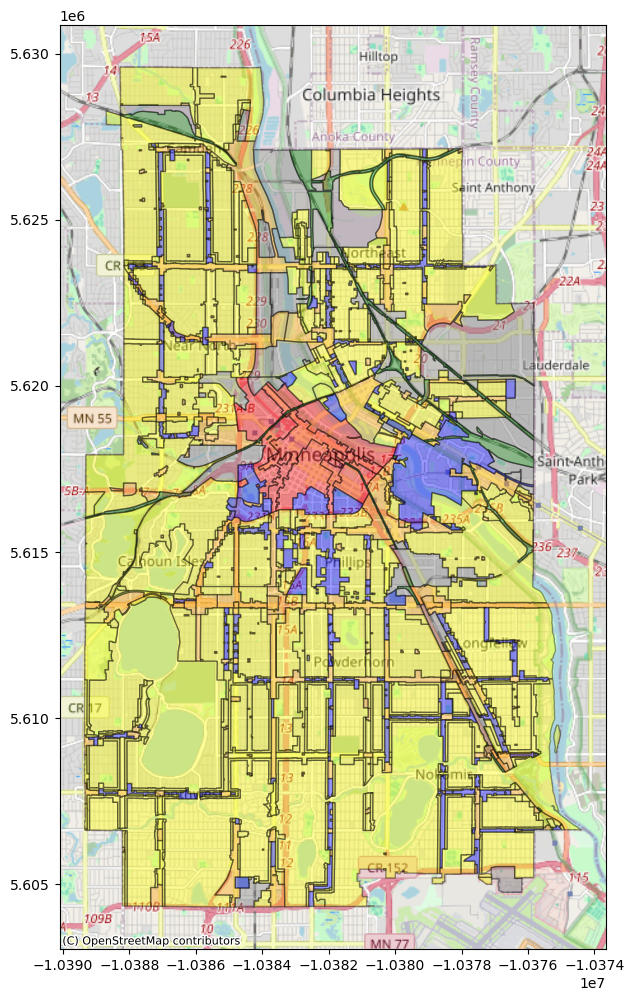

In [141]:
shp_2025_filePath = r"Planning_Primary_Zoning\Planning_Primary_Zoning.shp"

gdf_2025 = gpd.read_file(shp_2025_filePath)
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 12))

gdf_2025["color"] = "cyan"
gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('UN'), 'color'] = 'yellow'
gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('RM'), 'color'] = 'blue'
gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('CM'), 'color'] = 'orange'
gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('DT'), 'color'] = 'red'
gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('PR'), 'color'] = 'grey'
gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('TR'), 'color'] = 'green'
gdf_2025.plot(ax=ax1, color=gdf_2025["color"], edgecolor='k', linewidth=1.0, alpha=0.4)
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)

gdf_2025


In [142]:
# Get unique values for 'Land_Use' --> i call it primary zonings (this is what its actually called in the documents: https://www2.minneapolismn.gov/business-services/planning-zoning/zoning-maps/zoning-code-descriptions/#d.en.202240)
def getUniqueFields(df, col):
    out = df[col].unique()
    print(out)
    print(len(out))
    return out

primary_zonings = getUniqueFields(gdf_2025, "Land_Use")
primary_zonings_c = getUniqueFields(gdf_2025, "Land_Use_C")


# primary_zonings = gdf_2025['Land_Use'].unique()
# print("Unique values in 'Land_Use':")
# print(primary_zonings)
# print(len(primary_zonings))
# print("--------------------------------------")

# primary_zonings_c = gdf_2025['Land_Use_C'].unique()
# print("Unique values in 'Land_Use_C':")
# print(primary_zonings_c)
# print(len(primary_zonings_c))

# gdf_2025[["Land_Use", "Land_Use_C"]]

['Community Mixed Use' 'Corridor Mixed Use' 'Destination Mixed Use'
 'Downtown Center' 'Downtown Destination' 'Neighborhood Mixed Use'
 'Production and Processing' 'Production Mixed Use'
 'Residence and Institutional' 'Residence Goods and Services'
 'Residence Office and Services' 'Transportation' 'Urban Neighborhood 1'
 'Urban Neighborhood 2' 'Urban Neighborhood 3']
15
['CM3' 'CM2' 'CM4' 'DT1' 'DT2' 'CM1' 'PR2' 'PR1' 'RM3' 'RM1' 'RM2' 'TR1'
 'UN1' 'UN2' 'UN3']
15


,Land_Use,Built_Form,geometry,color
0,Production Mixed Use,Corridor 4,"POLYGON ((522844.222 168181.331, 522715.753 16...",cyan
1,Parks and Open Space,Parks,"POLYGON ((522715.753 167870.372, 522697.247 16...",cyan
2,Production Mixed Use,Corridor 4,"POLYGON ((522288.307 167820.479, 522285.959 16...",cyan
3,Production Mixed Use,Corridor 4,"POLYGON ((522285.959 167071.489, 522288.307 16...",cyan
4,Production Mixed Use,Corridor 4,"POLYGON ((523375.282 167814.991, 523373.946 16...",cyan
...,...,...,...,...
102561,Urban Neighborhood,Interior 3,"POLYGON ((534877.492 174991.329, 534876.877 17...",cyan
102562,Urban Neighborhood,Interior 3,"POLYGON ((534877.492 174991.329, 535006.983 17...",cyan
102563,Urban Neighborhood,Interior 3,"POLYGON ((534878.016 174953.675, 535007.507 17...",cyan
102564,Urban Neighborhood,Interior 3,"POLYGON ((534881.062 174735.073, 535010.564 17...",cyan


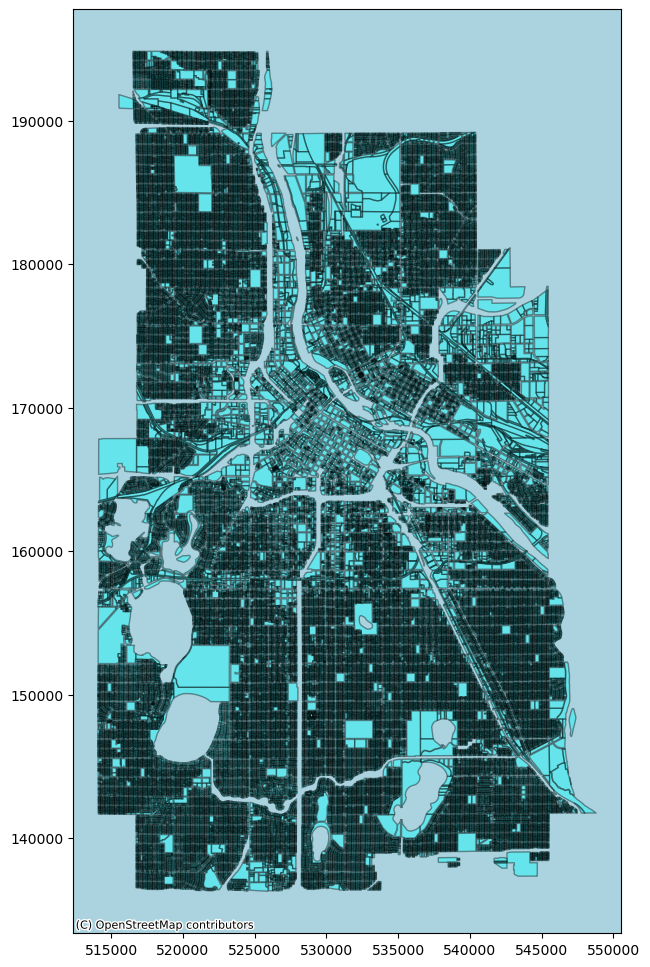

In [148]:
shp_2040_filePath = r"Future_Land_Use_and_Built_Form_2040\Future_Land_Use_and_Built_Form_2040.shp"
gdf_2040 = gpd.read_file(shp_2040_filePath)

# for quicker development purposes for now
# gdf_2040 = gdf_2040[:10000] 
# gdf_2040 = gdf_2040[["ZIPCD","X_CENTROID", "Y_CENTROID", "Acres", "Land_Use", "Built_Form", "RuleID_BF", "RuleID_LU", "Shape__Are", "Shape__Len", "geometry"]]
gdf_2040 = gdf_2040[["Land_Use", "Built_Form", "geometry"]]

gdf_2040["color"] = "cyan"
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 12))
gdf_2040.plot(ax=ax2, color=gdf_2040["color"], edgecolor='k', linewidth=1.0, alpha=0.4)
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)

gdf_2040

In [ ]:
Land_Use = getUniqueFields(gdf_2040, "Land_Use")
Built_Form = getUniqueFields(gdf_2040, "Built_Form")
# RuleID_BF = getUniqueFields(gdf_2040, "RuleID_BF")
# RuleID_LU = getUniqueFields(gdf_2040, "RuleID_LU")


['Production Mixed Use' 'Parks and Open Space' 'Corridor Mixed Use'
 'Production and Processing' 'Urban Neighborhood' 'Community Mixed Use'
 'Destination Mixed Use' 'Neighborhood Mixed Use' 'Transportation'
 'Public, Office, and Institutional' 'Neighborhood Office and Services']
11
['Corridor 4' 'Parks' 'Transit 10' 'Corridor 6' 'Transit 15' 'Interior 2'
 'Interior 3' 'Interior 1' 'Corridor 3' 'Production' 'Transportation'
 'Transit 30' 'Core 50' 'Transit 20']
14
['Corridor 4' 'Parks' 'Transit 10' 'Corridor 6' 'Transit 15' 'Interior 2'
 'Interior 3' 'Interior 1' 'Corridor 3' 'Production' 'Transportation'
 'Transit 30' 'Core 50' 'Transit 20']
14
['Production Mixed Use' 'Parks and Open Space' 'Corridor Mixed Use'
 'Production and Processing' 'Urban Neighborhood' 'Community Mixed Use'
 'Destination Mixed Use' 'Neighborhood Mixed Use' 'Transportation'
 'Public, Office, and Institutional' 'Neighborhood Office and Services']
11


## 2.2. Functions
This section defines all functions that will be used in your MVP and Project.

### Pre-processing functions

In [ ]:
def please_rename_me():
    pass

def rename_me_too():
    pass

### Analysis functions


In [ ]:
def another_function():
    pass

### Misc. functions

In [ ]:
def yet_another_function_here():
    pass

## 2.3. Execute your code. Let's go
These code cells will actually make your code run. Up until now you have only imported modules and defined modules.
This is where you start running code, passing variables, and creating maps, plots, and analytical results.

### Preparation and Pre-Processing Phase

In [ ]:
# Preparation and pre-processing code here

rename_me_too()

### Analysis and Modeling Phase

In [ ]:
another_function()

### Visualization and Plotting Phase

In [ ]:
yet_another_function_here()

## 2.4. Rationale
Why is this an MVP?
